# Taller de Manejo y Análisis de Datos

**Profesor: Pedro Montealegre**

### Pauta Guía de ejercicios para la Prueba


## Ejercicio 1

En este ejercicio se les entrega una base de datos `Athletes.csv` la cual contiene información sobre los atletas que compitieron en las últimas olimpiadas de Japón 2021. Más precisamente, se trata de una tabla en formato *csv* con las columnas `Name`, `Country`, `Discipline`. 

Los datos están ordenados por apellidos de los atletas. 

Sobre estos datos, se le pide realizar las siguientes actividades.

Escriba un programa que genere la lista `Atletas_por_pais.csv` la cual contiene los mismos datos que `Athletes.csv` pero ordenados por país. Es decir, donde aparezca la columna `Country` ordenada, y donde los atletas de un mismo país queden ordenados alfabeticamente. 

In [4]:
# Escriba aquí su solución


archivo = open("Athletes.csv","r")
lineas = archivo.readlines()    
archivo.close()

lista_paises = []
for linea in lineas[1:]:
    valores = linea.split(",")
    lista_paises.append(valores[1])

salida = open("Atletas_por_pais.csv","w")
salida.write(lineas[0])

while len(lista_paises)>0:
    indice = lista_paises.index(min(lista_paises))
    linea = lineas.pop(indice+1)
    lista_paises.pop(indice)
    salida.write(linea)

salida.close()

## Ejercicio 2

En este ejercicio seguiremos trabajando con la base de datos `Athletes.csv`. Escriba un programa en el que el usuario ingrese el nombre de un país, y a continuación se genere un histograma de atletas de dicho país. 

**Ejemplos:**

```
Ingrese el nombre de un país: Chile

Histograma de disciplinas para Chile

|               Disciplina|   Porcentaje|
-----------------------------------------
|                   Rowing|         3.6%|
|                Wrestling|         1.8%|
|                 Football|        37.5%|
|                  Archery|         1.8%|
|                   Tennis|         1.8%|
|        Modern Pentathlon|         1.8%|
|      Artistic Gymnastics|         3.6%|
|                 Swimming|         3.6%|
|                 Shooting|         1.8%|
|                Athletics|         5.4%|
|         Beach Volleyball|         3.6%|
|             Canoe Sprint|         3.6%|
|            Weightlifting|         3.6%|
|                Triathlon|         3.6%|
|                     Golf|         3.6%|
|               Equestrian|         3.6%|
|    Cycling BMX Freestyle|         1.8%|
|                  Fencing|         1.8%|
|                  Sailing|         1.8%|
|                  Surfing|         1.8%|
|             Cycling Road|         1.8%|
|            Skateboarding|         1.8%|
|                     Judo|         1.8%|
|             Table Tennis|         1.8%|
|    Cycling Mountain Bike|         1.8%|
```

```
Ingrese el nombre de un país: Cyprus

Histograma de disciplinas para Cyprus

|               Disciplina|   Porcentaje|
-----------------------------------------
|                 Shooting|        21.4%|
|                 Swimming|        14.3%|
|                Athletics|        21.4%|
|                  Sailing|        28.6%|
|             Cycling Road|         7.1%|
|      Artistic Gymnastics|         7.1%|
```

In [5]:
# Escriba aquí su solución

archivo = open("Athletes.csv","r")
lineas = archivo.readlines()    
archivo.close()

pais = input("Ingrese el nombre de un país: ")

lista_disciplinas = []
repeticiones = []
Total = 0
for linea in lineas[1:]:
    valores = linea.split(",")
    if(valores[1]==pais):
        Total +=1
        disciplina = valores[2][:-1]
        if not disciplina in lista_disciplinas:
            lista_disciplinas.append(disciplina)
            repeticiones.append(1)
        else:
            indice = lista_disciplinas.index(disciplina)
            repeticiones[indice] += 1
        
        
print("\nHistograma de disciplinas para", pais)
print()
print("|%25s|%13s|"%("Disciplina", "Porcentaje"))
print(41*"-")
for i in range(len(lista_disciplinas)):
    print("|%25s|%12.1f%%|" %(lista_disciplinas[i],100*repeticiones[i]/Total))


Ingrese el nombre de un país: 

Histograma de disciplinas para 

|               Disciplina|   Porcentaje|
-----------------------------------------


## Ejercicio 3

Para esta actividad, se les provee el archivo `poblacion_por_edad_y_comuna.csv`, `primera_por_edad_y_comuna.csv`, el cual contiene datos sobre la población y sobre el proceso de vacunación con primera dosis. La información se entrega en las siguientes comunas:

```Region, Código region, Comuna, 18, .... , 80```

donde `18, ... , 80` son 63 columnas que contienen el número de vacunados para el correspondiente grupo etario, donde la última columna contiene a los vacunados de 80 años o más. 

Su tarea consiste en escribir una función que reciba como argumento el número de una región y genere un histograma con el porcentaje de vacunados para los habitantes de las region dada, en los tramos siguientes:
* menores de 20,
* entre 20 y 30,
* entre 30 y 40,
* entre 40 y 50,
* entre 50 y 60,
* entre 60 y 70,
* entre 70 y 80,
* 80 o más.

(en todos los tramos anteriores, no se incluye el extremo superior)

Su programa debe imprimir una tabla como se muestra en el ejemplo a continuación:

```
>>ejercicio3(13)

Histograma de vacunación para la región Metropolitana 

| Rango de edad| Porcentaje de vacunados|
-----------------------------------------
|          < 20|                  61.42%|
|       [20,30[|                  72.58%|
|       [30,40[|                  76.89%|
|       [40,50[|                  81.63%|
|       [50,60[|                  90.99%|
|       [60,70[|                  87.95%|
|       [70,80[|                  91.21%|
|           80+|                  88.07%|
          
```

In [6]:
# Escriba aquí su solución
def ejercicio3(region):
    # Leemos los datos de entrada
    archivo_entrada = open("poblacion_por_edad_y_comuna.csv","r",encoding="utf-8")
    # Guardamos las líneas
    lineas_poblacion = archivo_entrada.readlines()
    # y cerramos el archivo de entrada
    archivo_entrada.close()

    # Leemos los datos de entrada
    archivo_entrada = open("primera_por_edad_y_comuna.csv","r",encoding="utf-8")
    # Guardamos las líneas
    lineas_primera = archivo_entrada.readlines()
    # y cerramos el archivo de entrada
    archivo_entrada.close()    


    # Definimos una variable para la suma de cada grupo del histograma
    conteo_primera = [0]*8
    conteo_poblacion = [0]*8
    nombre_region = ""
    n = len(lineas_primera[1:])

    for l in range(n):
        valores_poblacion = lineas_poblacion[l+1].split(",") 
        valores_primera = lineas_primera[l+1].split(",")

        if(int(valores_poblacion[1]) == region):
            nombre_region = valores_poblacion[0]

            conteo_primera[0]  += int(float(valores_primera[3]) + float(valores_primera[4]))
            conteo_primera[7]  += int(float(valores_primera[-1]))

            conteo_poblacion[0] += int(float(valores_poblacion[3]) + float(valores_poblacion[4]))
            conteo_poblacion[7] += int(float(valores_poblacion[-1]))

            for i in range(6):
                for j in range(10):
                    conteo_primera[i+1]   += int(float(valores_primera[5+j+10*i]))
                    conteo_poblacion[i+1] += int(float(valores_poblacion[5+j+10*i]))

    # Imprimimos el histograma
    print()
    print("Histograma de vacunación para la región",nombre_region,"\n")
    print("| Rango de edad| Porcentaje de vacunados|")
    print("-"*41)
    print("|%14s|%23.2f%%|" %("< 20",    100*conteo_primera[0]/conteo_poblacion[0]) )
    print("|%14s|%23.2f%%|" %("[20,30[", 100*conteo_primera[1]/conteo_poblacion[1]) )
    print("|%14s|%23.2f%%|" %("[30,40[", 100*conteo_primera[2]/conteo_poblacion[2]) )
    print("|%14s|%23.2f%%|" %("[40,50[", 100*conteo_primera[3]/conteo_poblacion[3]) )
    print("|%14s|%23.2f%%|" %("[50,60[", 100*conteo_primera[4]/conteo_poblacion[4]) )
    print("|%14s|%23.2f%%|" %("[60,70[", 100*conteo_primera[5]/conteo_poblacion[5]) )
    print("|%14s|%23.2f%%|" %("[70,80[", 100*conteo_primera[6]/conteo_poblacion[6]) )
    print("|%14s|%23.2f%%|" %("80+",     100*conteo_primera[7]/conteo_poblacion[7]) )
    
    
ejercicio3(13)


Histograma de vacunación para la región Metropolitana 

| Rango de edad| Porcentaje de vacunados|
-----------------------------------------
|          < 20|                  61.42%|
|       [20,30[|                  72.58%|
|       [30,40[|                  76.89%|
|       [40,50[|                  81.63%|
|       [50,60[|                  90.99%|
|       [60,70[|                  87.95%|
|       [70,80[|                  91.21%|
|           80+|                  88.07%|


## Ejercicio 4: hundimiento del Titanic

El objetivo de este problema es visualizar datos sobre la tragedia del Titanic. El RMS Titanic fue un transatlántico británico, considerado la mayor embarcación de transporte de pasajeros de su época y que naufragó la madrugada del 15 de abril de 1912. En el hundimiento del Titanic, se estima que murieron más de la mitad de las personas que iban a bordo. Esto último convierte a esta catástrofe en uno de los mayores naufragios de la historia ocurridos en tiempos de paz.

In [7]:
# Importamos las librerías necesarias.
import pandas as pd
import numpy as np

### Actividad 1

Para desarrollar esta actividad primero se importan los datos disponibles en el archivo titanic.cvs adjunto.

1) Asigne los datos a la variable titanic, utilizando pandas.

2) Nombre las filas  de la tabla con el nombre 'PassengerID'

In [8]:
# Creando variable titanic
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Nombrando filas
titanic = titanic.set_index('PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Actividad 2

Visualice la proporción de hombres y mujeres que iban a bordo del barco. Para ello, cree un gráfico de torta ('pie chart') o circular. 

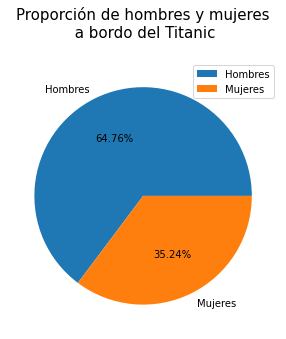

In [10]:
# Escriba aquí su solución

hombres = 100*(titanic['Sex'] == 'male').sum()/len(titanic['Sex'])
mujeres = 100*(titanic['Sex'] == 'female').sum()/len(titanic['Sex'])
hombres_label = "%1.1f %%"%(hombres)
mujeres_label = "%1.1f %%"%(mujeres)
proporciones = pd.DataFrame({'Sexo':['Hombres','Mujeres'],'Porcentajes':[hombres, mujeres]})
proporciones = proporciones.set_index("Sexo")
ax = proporciones.plot(kind="pie", y = "Porcentajes", autopct='%1.2f%%',  figsize = (5,5));
ax.set_ylabel(None); 
ax.set_title("Proporción de hombres y mujeres\n a bordo del Titanic\n", fontsize = 15);

### Actividad 3

Cree un gráfico de dispersión (scattered plot) para visualizar el costo del pasaje ('Fare') según la edad de cada pasajero. Use colores para distinguir hombres y mujeres.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

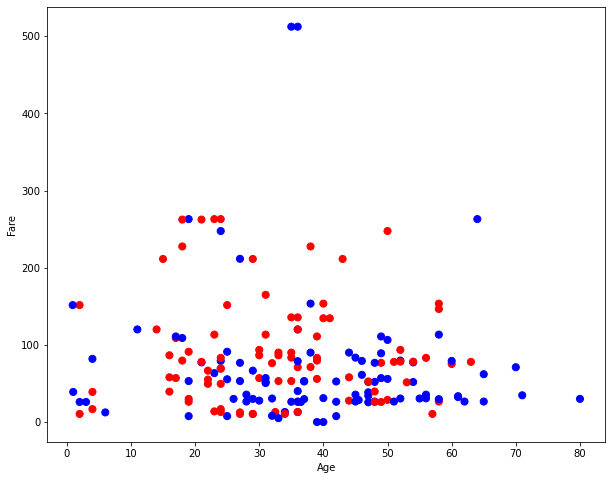

In [11]:
# Escriba aquí su solución

# Generamos una Serie en que reemplazamos los géneros con colores (azul para hombres y rojo para mujeres)
sexos = titanic.dropna()["Sex"]
sexos = sexos.replace(["female","male"],["r","b"])

# Hacemos el gráfico de dispersión
titanic.dropna().plot.scatter(x = "Age", y = "Fare", s = 50, c = sexos, figsize = (10,8))


### Actividad 4

Calcule la proporción de sobrevivientes y visualice su resultado utilizando un gráfico de barras. 

Sobrevivió 38.4 % de los pasajeros


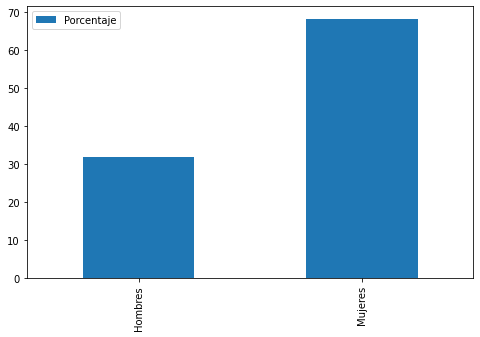

In [12]:
# Escriba aquí su solución

#Calculando sobrevivientes
total_sobrevivientes = titanic["Survived"].sum()
total_pasajeros = len(titanic['Survived'])
proporcion = total_sobrevivientes/total_pasajeros
print('Sobrevivió %1.1f %% de los pasajeros'%(100*proporcion))

#Calculando sobrevivientes por sexo
mujeres_sobrevivientes = len(titanic[(titanic["Survived"]==1) & (titanic["Sex"]=="female")])
hombres_sobrevivientes = len(titanic[(titanic["Survived"]==1) & (titanic["Sex"]=="male")])

# Construímos un DataFrame con los porcentajes de sobrevivientes
porcentaje_sobrevivientes = pd.DataFrame({'Sexo':['Hombres','Mujeres'], 'Porcentaje':[100*(hombres_sobrevivientes/total_sobrevivientes),100*(mujeres_sobrevivientes/total_sobrevivientes)]})
mujeres_label = "%1.1f %%"%(100*(mujeres_sobrevivientes /total_sobrevivientes))
hombres_label = "%1.1f %%"%(100*(hombres_sobrevivientes /total_sobrevivientes))

# Hacemos el gráfico
ax = porcentaje_sobrevivientes.plot.bar(x = "Sexo", y = "Porcentaje", figsize = (8,5));
ax.set_xlabel("");

## Ejercicio 5 

La pandemia a golpeado fuertemente al rubro de la alimentación y en particular a los restaurantes. Preocupados por esta situación, y en particular, por la situación de los trabajadores, una firma nacional propietaria de una conocida cadena de restaurantes con sede en todo el país, le solicita analizar los datos del consumo diario en uno de sus locales.

### Actividad 1: Limpieza de datos

1) Importe los datos contenidos en el archivo consumo.csv

2) Revise las distintas columnas y elimine aquellas que no aporten información de ser necesario


In [13]:
# Escriba aquí su solución
consumo = pd.read_csv('consumo.csv')
consumo.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
consumo = consumo.drop("Unnamed: 0", axis = 1)
consumo.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Actividad 2: Visualizando el consumo total

Construya un histograma utilizando la información del total de consumo contenida en la columna "total_bill"

Text(0.5, 1.0, 'Histograma del Consumo Total')

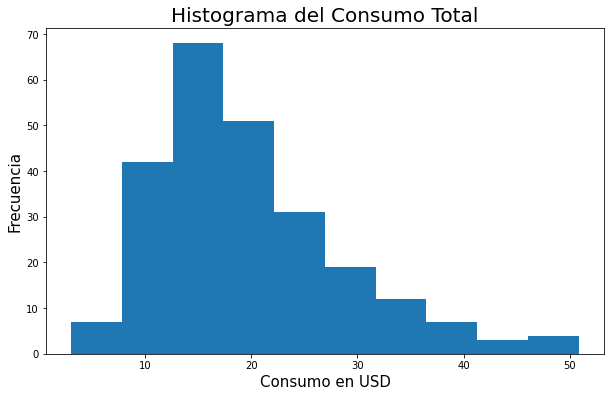

In [15]:
# Escriba aquí su solución
ax  = consumo.plot(kind = "hist", y='total_bill', legend = False, figsize = (10,6))
ax.set_xlabel('Consumo en USD', fontsize = 15)
ax.set_ylabel('Frecuencia', fontsize = 15)
ax.set_title('Histograma del Consumo Total', fontsize = 20)

### Actividad 3: Relacionando propinas y consumo total

1) Visualice la relación que existe entre el consumo total y las propinas. Para ello cree un gráfico de dispersión utilizando la información de la columna "total_bill" y "tip".

2) Visualice la relación entre la cantidad de comensales y las propinas. Para ello repita lo anterior para las columnas "tip" y "size" generando el mismo gráfico.

Text(0.5, 1.0, 'Consumo total v/s propina')

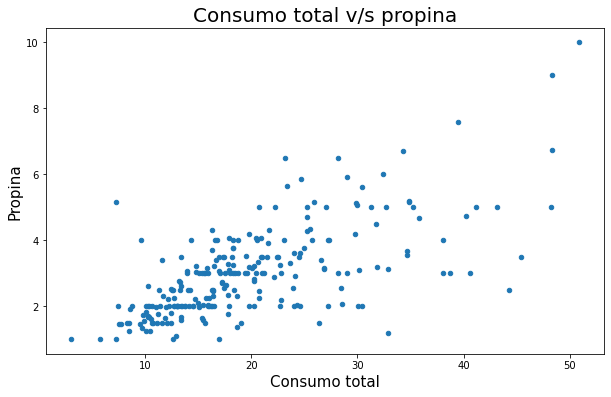

In [16]:
# Escriba aquí su solución
# 1)
ax = consumo.plot(kind = "scatter", x='total_bill',y='tip', figsize = (10,6))
ax.set_xlabel('Consumo total',fontsize=15)
ax.set_ylabel('Propina',fontsize=15)
ax.set_title('Consumo total v/s propina',fontsize=20)

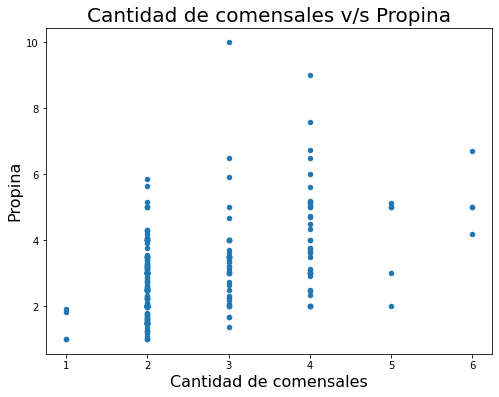

In [17]:
#2)
ax = consumo.plot(kind = "scatter", x='size',y='tip', figsize = (8,6), grid = True)
ax.set_xlabel('Cantidad de comensales',fontsize=16)
ax.set_ylabel('Propina',fontsize=16)
ax.set_title('Cantidad de comensales v/s Propina', fontsize=20)
ax.grid(False)

## Ejercicio 6 

Un profesor universitario prepara un análisis de los resultados de sus estudiantes en cierto curso de postgrado. Usted como su ayudante, debe ayudarlo en la labor de entender cuál fue la progresión de los resultados de cada estudiante antes y después del examen final.

### Actividad 1: Creando un marco de datos.

Antes de comenzar a trabajar con los datos, el profesor descubre que la información se ha perdido. Dado que el análisis debe realizarse rápidamente y el curso cuenta con pocos estudiantes, le entrega a usted la siguiente imagen como única información:



1) Cree un dataframe que se vea exactamente igual a la imagen enviada por el profesor

In [18]:
# Escriba aquí su solución

datos = {'Nombre': ['Juan', 'María', 'Emiliana', 'Joaquín', 'Renata'], 
            'Apellido': ['Perez', 'López', 'Echeñique', 'Casas', 'Pereira'], 
            'Genero': ['Masculino', 'Femenino', 'Femenino', 'Masculino', 'Femenino'],
            'Edad': [32, 22, 36, 24, 23], 
            'Nota presentación': [6, 4.4, 3.1, 7.0, 3.0],
            'Nota examen': [2.5, 7.0, 5.7, 6.2, 5.0]}

notas = pd.DataFrame(datos, columns = ['Nombre', 'Apellido', 'Edad', 'Genero', 'Nota presentación', 'Nota examen'])

notas

,Nombre,Apellido,Edad,Genero,Nota presentación,Nota examen
0,Juan,Perez,32,Masculino,6.0,2.5
1,María,López,22,Femenino,4.4,7.0
2,Emiliana,Echeñique,36,Femenino,3.1,5.7
3,Joaquín,Casas,24,Masculino,7.0,6.2
4,Renata,Pereira,23,Femenino,3.0,5.0


### Actividad 2:

Cree un gráfico de dispersión que muestre la relación entre las notas de presentación y las notas del exámen. Diferencie mediante el color el género de los estudiantes y mediante el tamaño su edad.

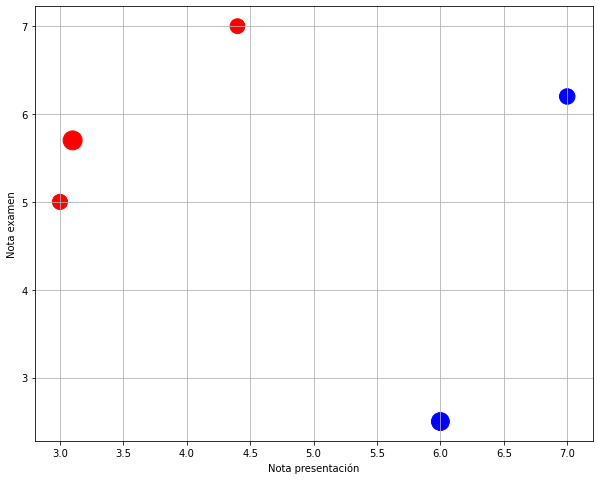

In [19]:
# Escriba aquí su solución

sexos = notas["Genero"].replace(["Femenino","Masculino"],["r","b"])

ax = notas.plot.scatter(x = "Nota presentación", y = "Nota examen", s = 10*notas["Edad"], c = sexos, figsize = (10,8))
ax.grid(True)

### Actividad 3:

1) Si para pasar el curso el examen vale un 60% de la nota final y el curso se aprueba con un 5.0, calcule la proporción de estudiantes que han aprobado.

2) Construya un gráfico de torta que muestre el procentaje de aprobación.

3) Construya un gráfico de dispersión que muestre la relación entre la nota final y la edad. ¿Qué tendencia se observa?

In [20]:
# Escriba aquí su solución
# 1)

notas["Nota final"] =round(0.4*notas['Nota presentación'] + 0.6*notas['Nota examen'],1)
notas["Aprobado"] = notas["Nota final"]>=5.0
notas

,Nombre,Apellido,Edad,Genero,Nota presentación,Nota examen,Nota final,Aprobado
0,Juan,Perez,32,Masculino,6.0,2.5,3.9,False
1,María,López,22,Femenino,4.4,7.0,6.0,True
2,Emiliana,Echeñique,36,Femenino,3.1,5.7,4.7,False
3,Joaquín,Casas,24,Masculino,7.0,6.2,6.5,True
4,Renata,Pereira,23,Femenino,3.0,5.0,4.2,False


In [21]:
porcentaje_aprobados = 100*len(notas[notas["Aprobado"]])/len(notas['Nota presentación'])
print('Han aprobado %1.1f %% de los estudiantes.'%(porcentaje_aprobados))

Han aprobado 40.0 % de los estudiantes.


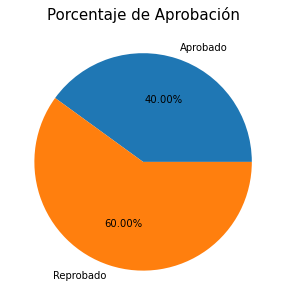

In [22]:
# 2
porcentajes = [porcentaje_aprobados, 100 - porcentaje_aprobados]
Serie_porcentajes = pd.Series(porcentajes, index = ['Aprobado','Reprobado'])
aprobados_label = "%1.1f %%"%(porcentajes[0])
reprobados_label = "%1.1f %%"%(porcentajes[1])

ax = Serie_porcentajes.plot(kind="pie", y = "Porcentaje", autopct='%1.2f%%',figsize = (5,5));
ax.set_ylabel(None); 
ax.set_title("Porcentaje de Aprobación", fontsize = 15);



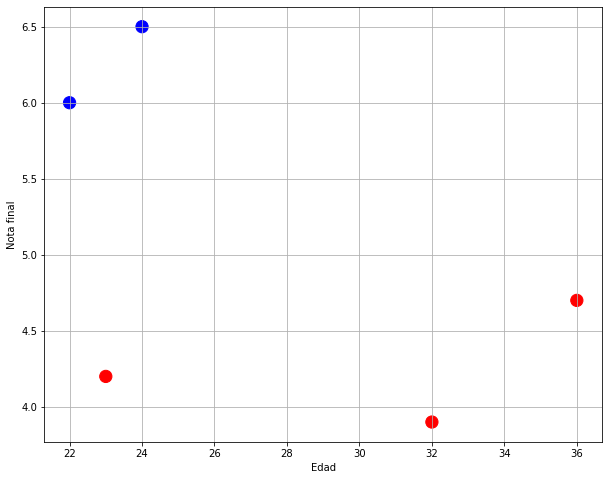

In [23]:
# 3)
aprobados = notas["Aprobado"].replace([True,False],["b","r"])

ax = notas.plot.scatter(x = "Edad", y = "Nota final", s = 150, c = aprobados, figsize = (10,8))
ax.grid(True)

Tenemos que todos los mayores de 30 años reprobaron el curso mientras que los 2/3 de los menores de 30 aprobaron.

## Ejercicio 7

Una famosa universidad estadounidense realiza un estudio sobre la población del estado en donde está ubicada. Para ello, cuenta con un set de datos obtenidos de personas de distintas edades y ocupaciones y residentes en distintas ciudades. Usted es contratado para analizar estos datos contenidos en el archivo 'ocuapciones.csv'.

### Actividad 1: Limpiando los datos.

0) Importe los datos y guardelos en una variable llamada 'datos_población'.

1) Elimine cualquier columna que no aporte información.

2) Llame a las filas "user_id"

In [24]:
#0
datos_poblacion = pd.read_csv('ocupaciones.csv')
datos_poblacion.head()

,Unnamed: 0,user_id,age,gender,occupation,zip_code
0,0,1,24,M,technician,85711
1,1,2,53,F,other,94043
2,2,3,23,M,writer,32067
3,3,4,24,M,technician,43537
4,4,5,33,F,other,15213


In [25]:
#1
#Eliminamos columna
datos_poblacion =  datos_poblacion.drop('Unnamed: 0',axis=1)
datos_poblacion.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [26]:
#2
#Nombrando filas
datos_poblacion.set_index('user_id').head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


### Actividad 2:  Caracterizando la población

1) Construya un histograma con la frecuencia de las distintas profesiones.

2) Construya un histograma con la frecuencia de edad.

3) Construya un gráfico de torta con la proporción de hombres y mujeres.

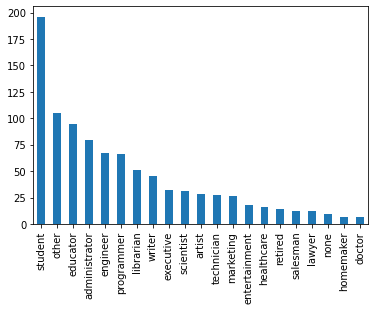

In [48]:
# Escriba aquí su solución
#1
datos_poblacion["occupation"].value_counts().plot(kind="bar");

<AxesSubplot:>

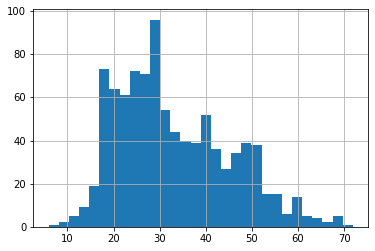

In [40]:
#2
datos_poblacion["age"].hist(bins = 30,align = "left")

Text(0.5, 1.0, 'Porcentaje de hombres y mujeres')

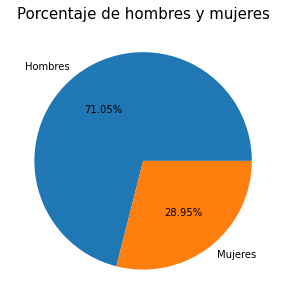

In [41]:
# 3

#Obtenemos frecuencia normalizada de la columna 'gender'
datos_sexo = 100*datos_poblacion['gender'].value_counts(normalize=True)

#Renombramos 
datos_sexo = datos_sexo.rename({'M':'Hombres','F':'Mujeres'})
datos_sexo

#Hacemos plot 
ax = datos_sexo.plot(kind='pie',ylabel='', autopct='%1.2f%%', figsize = (10,5))
ax.set_title('Porcentaje de hombres y mujeres', fontsize = 15)

### Actividad 3:  Cruzando información e identificando grupos de interés.

1) Construya un histograma con la frecuencia de las distintas profesiones en la población menor de 18 años. ¿Cuál es la profesión más frecuente en este rango etario?

2) Construya un histograma con la frecuencia de las distintas profesiones en la población mayor de 60 años.¿Cuál es la profesión más frecuente en este rango etario?

In [42]:
# Escriba aquí su solución

# 1)
# Filtramos a los menores de 18 de años.
menores_18 = datos_poblacion[datos_poblacion['age']<18]
menores_18.head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
56,57,16,M,none,84010
66,67,17,M,student,60402
100,101,15,M,student,05146
141,142,13,M,other,48118


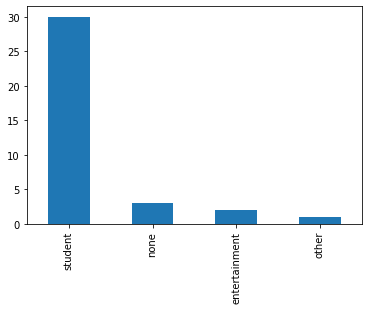

In [49]:
menores_18['occupation'].value_counts().plot(kind="bar");

In [50]:
#2
#Buscamos los mayores de 60 de años.
mayores_60 = datos_poblacion[datos_poblacion['age']>=60]
mayores_60.head()

,user_id,age,gender,occupation,zip_code
89,90,60,M,educator,78155
105,106,61,M,retired,55125
210,211,66,M,salesman,32605
233,234,60,M,retired,94702
265,266,62,F,administrator,78756


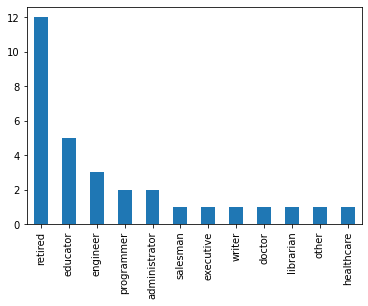

In [51]:
mayores_60['occupation'].value_counts().plot(kind="bar");

## __Pregunta 5__

Usted ha cumplido su sueño de convertirse en un entrenador Pokémon. Sin embargo, antes de comenzar su viaje, debe estudiar las distintas ventajas y desventajas que pueden darse en las batallas dependiendo de los tipos de Pokémon. Para ello, analizará los datos del archivo 'PokeTypeMatchupData.csv'. Estos contienen las distintas debilidades y ventajas para cada Pokémon. Observe que hay distintos valores numéricos ordenados por tipo: 

i) el valor 1 significa que el poder es **IGUAL**;

ii) los valores entre 0 y 0.5 (sin considerar 0.5) significan que el Pokémon es **PODEROSO**;

iii) los valores entre 0.5 (incluido) y 1 (sin incluir) significa que el Pokémon es **MEDIANAMENTE PODEROSO**; y

iv) los valores superiores a 1 significan que el pokemon es **DEBIL** contra ese tipo en particular.

### Actividad 1:  Limpieza de datos.

1) Elimine la columna 'number'

2) Elimine todos los string * de los valores incluidos y convierta todas las entradas de la tabla a float.
 

In [52]:
# Escriba aquí su solución

#importamos los datos
pokemon = pd.read_csv('PokeTypeMatchupData.csv')
pokemon.head()

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,#001,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5
1,Ivysaur,#002,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5
2,Venusaur,#003,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5
3,Charmander,#004,*1,*0.5,*2,*1,*0.5,*0.5,*1,*1,*2,*1,*1,*0.5,*2,*1,*1,*1,*0.5,*0.5
4,Charmeleon,#005,*1,*0.5,*2,*1,*0.5,*0.5,*1,*1,*2,*1,*1,*0.5,*2,*1,*1,*1,*0.5,*0.5


In [54]:
#Quitamos *
pokemon[pokemon.columns] = pokemon.apply(lambda x: x.str.strip("*"))
pokemon.head()

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,#001,1,2,0.5,0.5,0.25,2,0.5,1,1,2,2,1,1,1,1,1,1,0.5
1,Ivysaur,#002,1,2,0.5,0.5,0.25,2,0.5,1,1,2,2,1,1,1,1,1,1,0.5
2,Venusaur,#003,1,2,0.5,0.5,0.25,2,0.5,1,1,2,2,1,1,1,1,1,1,0.5
3,Charmander,#004,1,0.5,2,1,0.5,0.5,1,1,2,1,1,0.5,2,1,1,1,0.5,0.5
4,Charmeleon,#005,1,0.5,2,1,0.5,0.5,1,1,2,1,1,0.5,2,1,1,1,0.5,0.5


In [55]:
# Vemos que las columnas no son de tipo float
pokemon["Normal"]

0      1
1      1
2      1
3      1
4      1
      ..
571    1
572    1
573    1
574    1
575    1
Name: Normal, Length: 576, dtype: object

In [57]:
# Las transformamos entonces a float
pokemon[pokemon.columns[2:]] = pokemon.iloc[:,2:].astype("float")
# Verificamos
pokemon["Normal"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
571    1.0
572    1.0
573    1.0
574    1.0
575    1.0
Name: Normal, Length: 576, dtype: float64

### Actividad 2: Escoja su pokémon.

Cree una función que reciba el nombre de un pokemon dado por la primera columna del archivo de datos y que imprima un string con la etiqueta "IGUAL", "PODEROSO", "MEDIANAMENTE FUERTE" y "DEBIL" según corresponda.

__Su código debe mostrar exactamente esto al ejecutarse con 'Blastoise' como input (sin espacios entre lineas):__

Blastoise tiene IGUAL poder que este tipo : Normal

Blastoise es  MEDIANAMENTE FUERTE   contra  este tipo : Fire

Blastoise es  MEDIANAMENTE FUERTE   contra  este tipo : Water

Blastoise es  DEBIL   contra  este tipo : Electric

Blastoise es  DEBIL   contra  este tipo : Grass

Blastoise es  MEDIANAMENTE FUERTE   contra  este tipo : Ice

Blastoise tiene IGUAL poder que este tipo : Fighting

Blastoise tiene IGUAL poder que este tipo : Poison

Blastoise tiene IGUAL poder que este tipo : Ground

Blastoise tiene IGUAL poder que este tipo : Flying

Blastoise tiene IGUAL poder que este tipo : Psychic

Blastoise tiene IGUAL poder que este tipo : Bug

Blastoise tiene IGUAL poder que este tipo : Rock

Blastoise tiene IGUAL poder que este tipo : Ghost

Blastoise tiene IGUAL poder que este tipo : Dragon

Blastoise tiene IGUAL poder que este tipo : Dark

Blastoise es  MEDIANAMENTE FUERTE   contra  este tipo : Steel

Blastoise tiene IGUAL poder que este tipo : Fairy




In [59]:
# Escriba aquí su solución

def escogePokemon(nombre_pokemon):
    fila_pokemon = pokemon[pokemon["Name"]==nombre_pokemon].iloc[0,2:]
    salida = pd.Series([""]*len(fila_pokemon), index = fila_pokemon.index)
    salida[fila_pokemon > 1] = "DEBIL"
    salida[(fila_pokemon<1)&(fila_pokemon>=0.5)] = "MEDIANAMENTE FUERTE"
    salida[(fila_pokemon<0.5)&(fila_pokemon>=0)] = "PODEROSO"
    salida[fila_pokemon == 1] = "IGUAL"
    return salida

In [60]:
escogePokemon("Pikachu")

Normal                    IGUAL
Fire                      IGUAL
Water                     IGUAL
Electric    MEDIANAMENTE FUERTE
Grass                     IGUAL
Ice                       IGUAL
Fighting                  IGUAL
Poison                    IGUAL
Ground                    DEBIL
Flying      MEDIANAMENTE FUERTE
Psychic                   IGUAL
Bug                       IGUAL
Rock                      IGUAL
Ghost                     IGUAL
Dragon                    IGUAL
Dark                      IGUAL
Steel       MEDIANAMENTE FUERTE
Fairy                     IGUAL
dtype: object

### Actividad 3: Analizando por tipo

1) Adapte el código de la parte anterior para generar un data frame cuali_pokemon que contiene la clasificación (DÉBIL, FUERTE, ETC) correspondiente en vez de los valores numéricos.


2) Cree una función que dado un tipo, entregado como un string de acuerdo a los datos iniciales, imprime un histograma mostrando la frecuencia de pokémones de la muestra que son "PODEROSOS", "IGUALES", "DEBILES" y "MEDIANAMENTE FUERTES" contra ese tipo en particular.

In [61]:
# Escriba aquí su solución

i = 3
cuali_pokemon = pokemon.copy()
for i in range(2,cuali_pokemon.shape[1]):
    indices_DEBIL = (cuali_pokemon.iloc[:,i]>1).values
    indices_IGUAL = (cuali_pokemon.iloc[:,i]==1).values
    indices_MEDFUERTE = ((cuali_pokemon.iloc[:,i]<1) & (cuali_pokemon.iloc[:,i]>=0.5)).values
    indices_PODEROSO = ((cuali_pokemon.iloc[:,i]<0.5) & (cuali_pokemon.iloc[:,i]>=0)).values

    cuali_pokemon.iloc[indices_DEBIL,i] = "DEBIL"
    cuali_pokemon.iloc[indices_IGUAL,i] = "IGUAL"
    cuali_pokemon.iloc[indices_MEDFUERTE,i] = "MEDIANAMENTE FUERTE"
    cuali_pokemon.iloc[indices_PODEROSO,i] = "PODEROSO"


In [62]:
cuali_pokemon

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,#001,IGUAL,DEBIL,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE,PODEROSO,DEBIL,MEDIANAMENTE FUERTE,IGUAL,IGUAL,DEBIL,DEBIL,IGUAL,IGUAL,IGUAL,IGUAL,IGUAL,IGUAL,MEDIANAMENTE FUERTE
1,Ivysaur,#002,IGUAL,DEBIL,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE,PODEROSO,DEBIL,MEDIANAMENTE FUERTE,IGUAL,IGUAL,DEBIL,DEBIL,IGUAL,IGUAL,IGUAL,IGUAL,IGUAL,IGUAL,MEDIANAMENTE FUERTE
2,Venusaur,#003,IGUAL,DEBIL,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE,PODEROSO,DEBIL,MEDIANAMENTE FUERTE,IGUAL,IGUAL,DEBIL,DEBIL,IGUAL,IGUAL,IGUAL,IGUAL,IGUAL,IGUAL,MEDIANAMENTE FUERTE
3,Charmander,#004,IGUAL,MEDIANAMENTE FUERTE,DEBIL,IGUAL,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE,IGUAL,IGUAL,DEBIL,IGUAL,IGUAL,MEDIANAMENTE FUERTE,DEBIL,IGUAL,IGUAL,IGUAL,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE
4,Charmeleon,#005,IGUAL,MEDIANAMENTE FUERTE,DEBIL,IGUAL,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE,IGUAL,IGUAL,DEBIL,IGUAL,IGUAL,MEDIANAMENTE FUERTE,DEBIL,IGUAL,IGUAL,IGUAL,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,Eternatus,#890,IGUAL,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE,PODEROSO,DEBIL,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE,DEBIL,IGUAL,DEBIL,MEDIANAMENTE FUERTE,IGUAL,IGUAL,DEBIL,IGUAL,IGUAL,IGUAL
572,Kubfu,#891,IGUAL,IGUAL,IGUAL,IGUAL,IGUAL,IGUAL,IGUAL,IGUAL,IGUAL,DEBIL,DEBIL,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE,IGUAL,IGUAL,MEDIANAMENTE FUERTE,IGUAL,DEBIL
573,Urshifu,#892,IGUAL,IGUAL,IGUAL,IGUAL,IGUAL,IGUAL,DEBIL,IGUAL,IGUAL,DEBIL,PODEROSO,IGUAL,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE,IGUAL,PODEROSO,IGUAL,DEBIL
574,Urshifu Rapid Strike,#892,IGUAL,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE,DEBIL,DEBIL,MEDIANAMENTE FUERTE,IGUAL,IGUAL,IGUAL,DEBIL,DEBIL,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE,IGUAL,IGUAL,MEDIANAMENTE FUERTE,MEDIANAMENTE FUERTE,DEBIL


In [63]:
def histTipo(tipo):
    cuali_pokemon[tipo].value_counts().plot(kind = "bar")

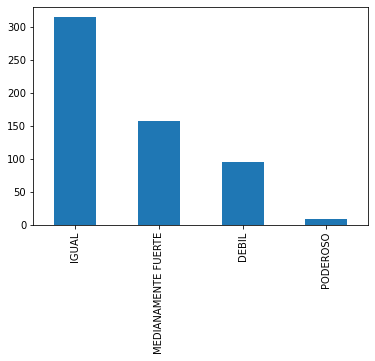

In [64]:
histTipo("Water")